# Decision Trees

In [1]:
from DecisionTree import *

In [2]:
NUM_TRIALS = 10
MIN_FEATURE = 3
MAX_FEATURE = 10

## Entropy cost function (3-10 features)

In [3]:
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function)

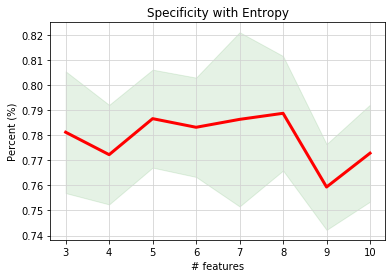

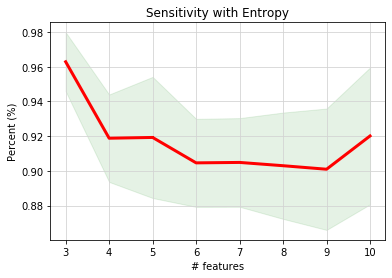

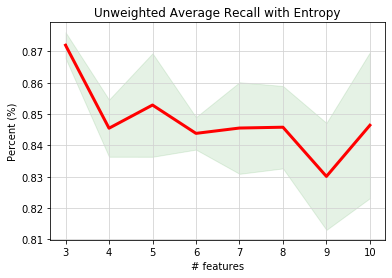

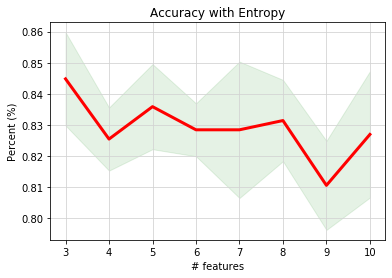

In [4]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function)

## Gini cost function (3-10 features)

In [5]:
cost_function = 'Gini'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function)

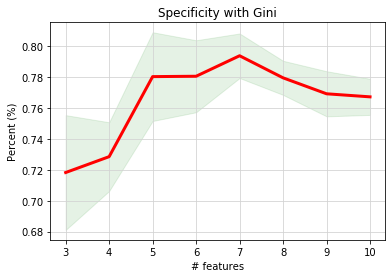

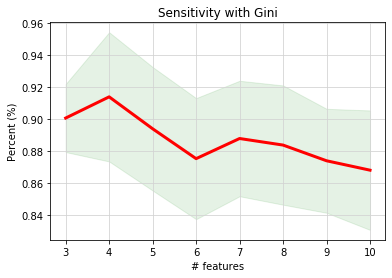

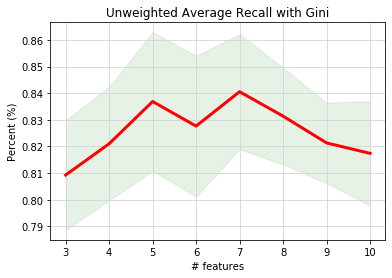

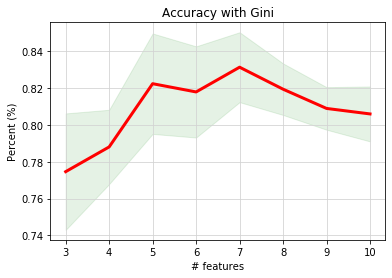

In [6]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function)

## Feature Analysis

In [7]:
NUM_TRIALS = 10
MIN_FEATURE = 30
MAX_FEATURE = 30
# run trials with all features count times features appear inversely weighted to tree depth i.e. 1/2^depth

### Entropy all feature analysis

In [8]:
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function, all_features=True)

In [9]:
feature_counts = get_weighted_feature_to_counts(trees)
table = sorted_feature_table(sorted(feature_counts.items(), key=lambda x:x[1], reverse=True))
feature_probs = get_prob_vector(feature_counts)
print(table)

+---------+------------------------+
| Feature |      Probability       |
+---------+------------------------+
|    9    |  0.16201468118331402   |
|    1    |  0.15869952993392963   |
|    10   |  0.12559541421313988   |
|    24   |  0.10758318264179431   |
|    6    |  0.06003637457371909   |
|    22   |  0.04405155147093847   |
|    14   |  0.041462622982365006  |
|    5    |  0.034472336824190854  |
|    15   |  0.032281904487031755  |
|    18   |  0.03172807979586401   |
|    16   |  0.030742312951068686  |
|    7    |  0.023676480530839317  |
|    25   |  0.019678539123911053  |
|    3    |  0.01921671782468355   |
|    17   |  0.01654448575838434   |
|    8    |  0.013924733385179168  |
|    11   |  0.012922153919764326  |
|    2    |  0.012493736800310693  |
|    0    |  0.011980479875314403  |
|    20   |  0.007065112476809093  |
|    19   |  0.007062495587032496  |
|    13   |  0.005628702873361629  |
|    29   |  0.004698643517783179  |
|    23   |  0.00371975945157835   |
|

### Gini all feature analysis

In [10]:
cost_function = 'Gini'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, trees, trees_g = run_trials(NUM_TRIALS, MIN_FEATURE, MAX_FEATURE, cost_function, all_features=True)

In [11]:
feature_counts = get_weighted_feature_to_counts(trees)
table = sorted_feature_table(sorted(feature_counts.items(), key=lambda x:x[1], reverse=True))
feature_probs = get_prob_vector(feature_counts)
print(table)

+---------+-----------------------+
| Feature |      Probability      |
+---------+-----------------------+
|    1    |  0.22965900600663727  |
|    9    |  0.13600119520084777  |
|    10   |  0.12814815667058682  |
|    14   |  0.07047882431116222  |
|    22   |  0.05188239796224965  |
|    15   |   0.0513387181886823  |
|    6    |  0.037836352133662626 |
|    24   |  0.03361442251138026  |
|    2    |  0.033410455341342966 |
|    7    |  0.032824295495593604 |
|    5    |  0.032824230054381454 |
|    23   |  0.027138290352797058 |
|    18   |  0.02643913389314834  |
|    0    |  0.020550146106995106 |
|    11   |  0.011151508302618567 |
|    20   |  0.010341782370916779 |
|    8    |  0.010304925880232421 |
|    25   |  0.009164131402001353 |
|    16   |  0.008461449842391349 |
|    12   |  0.006340034069669394 |
|    21   |  0.006214786133730488 |
|    13   |  0.005274387189602342 |
|    17   | 0.0048737706312955735 |
|    27   |  0.004617857681300685 |
|    3    | 0.00370147129928

# Random Forests

In [12]:
NUM_TREES = 10
NUM_TRIALS = 10
MIN_FEATURE = 3
MAX_FEATURE = 10

## Entropy forest (3-10 features)

In [13]:
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function)

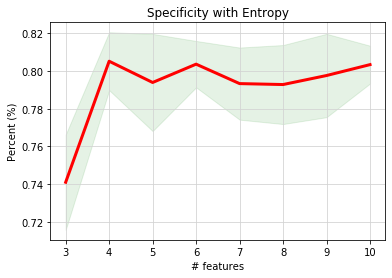

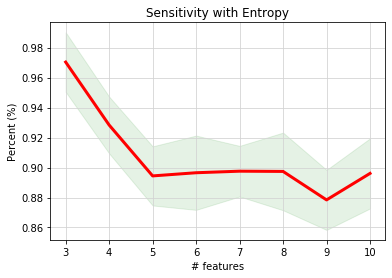

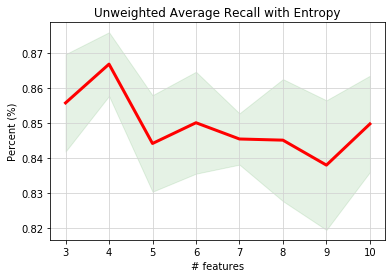

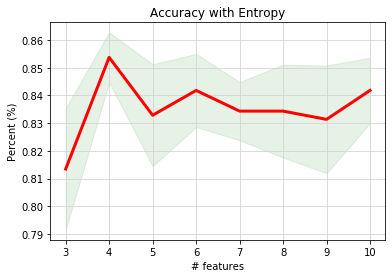

In [14]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function)

## Entropy forest (all features, equal probability)

In [15]:
NUM_TREES = 10
NUM_TRIALS = 10
MIN_FEATURE = 30
MAX_FEATURE = 30

In [16]:
probabilities = np.ones(30) / 30
cost_function = 'Entropy'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function, probabilities)

## Gini forest (3-10 features)

In [17]:
NUM_TREES = 10
NUM_TRIALS = 10
MIN_FEATURE = 3
MAX_FEATURE = 10

In [18]:
cost_function = 'Gini'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function)

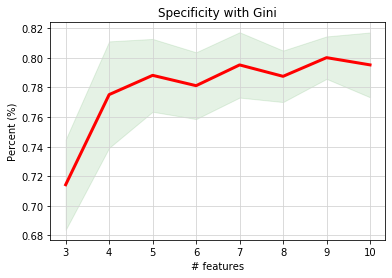

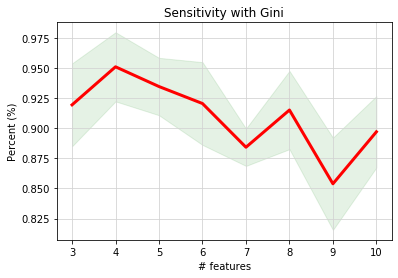

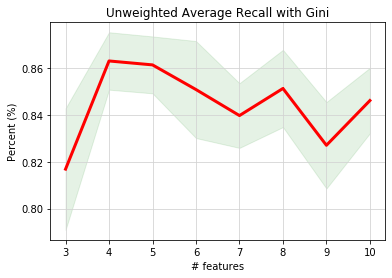

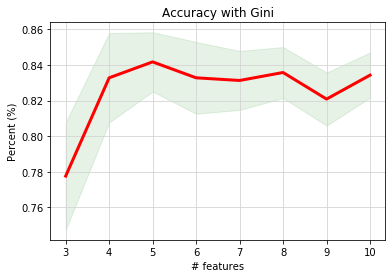

In [19]:
generate_performance_plots(feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar, cost_function)

## Gini forest (all features, equal probability)

In [20]:
NUM_TREES = 10
NUM_TRIALS = 10
MIN_FEATURE = 30
MAX_FEATURE = 30

In [21]:
probabilities = np.ones(30) / 30
cost_function = 'Gini'
feature_to_sensitivity, feature_to_specificity, feature_to_accuracy, feature_to_uar = random_forest_trials(NUM_TREES, NUM_TRIALS, MIN_FEATURE,MAX_FEATURE, cost_function, probabilities)